<a href="https://colab.research.google.com/github/ShashiKanth-Koppala/PassStrength/blob/main/PasswordGenerationClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

DATASET: - https://www.kaggle.com/datasets/bhavikbb/password-strength-classifier-dataset/data

In [ ]:
file_path = '/content/data.csv'
delimiter = ','
df = pd.read_csv(file_path, sep=delimiter, error_bad_lines=False)

In [ ]:
df.shape

(669640, 2)

In [ ]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
df.tail()

,password,strength
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1
669639,fxx4pw4g,1


In [ ]:
df.isna().sum()

password    1
strength    0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

password    0
strength    0
dtype: int64

In [ ]:
df["strength"] = df["strength"].map({0: "Weak", 1: "Medium", 2: "Strong"}) ##For mapping of values

In [ ]:
x = np.array(df["password"])
y = np.array(df["strength"])

In [ ]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character
#to generate a list of all characters in sequence present in the password

In [ ]:
tdif = TfidfVectorizer(tokenizer=word) #Using tfid to convert the data into vectors
X = tdif.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X.shape

(669639, 153)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Splitting into test amnd trsin

In [ ]:
model = RandomForestClassifier() #Initialising the Random Forest Classifier
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(x_test,y_test)

0.9556627441610418

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#For Recall
recall = recall_score(y_test, y_pred,average='weighted')
print(recall)

0.9556627441610418


In [ ]:
# Calculate precision
precision = precision_score(y_test, y_pred,average='weighted')
print(precision)

0.955801673490257


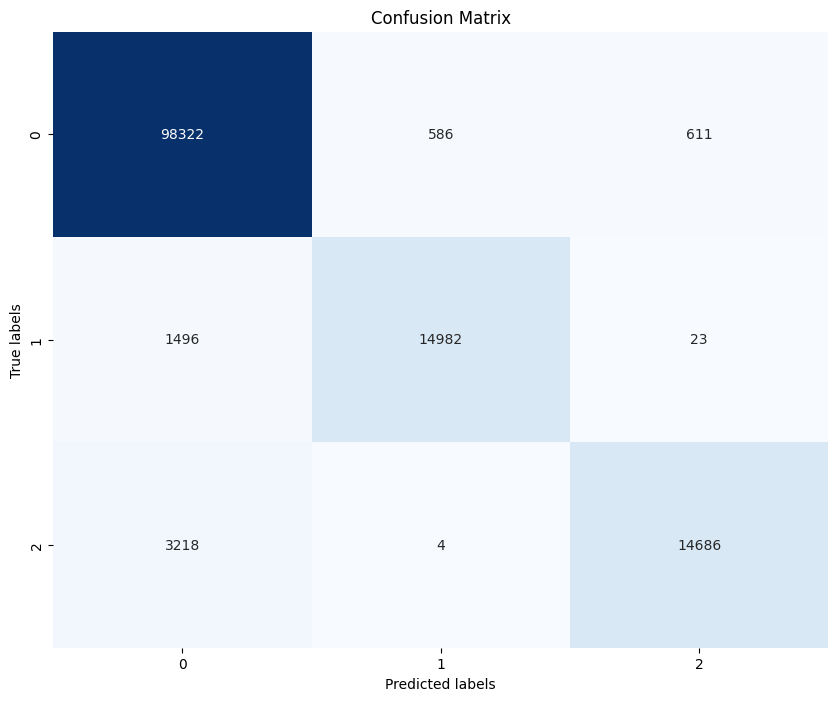

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib


joblib.dump(model, 'random_forest_model.pkl')  # Saving the model as pickle
joblib.dump(tdif, 'tfidf_vectorizer.pkl')  # Saving the TfidfVectorizer as pickle

['tfidf_vectorizer.pkl']